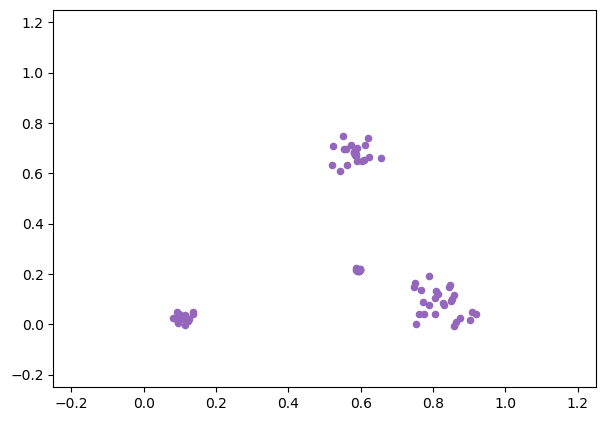

In [147]:
import math

import numpy as np
import random
seed = 19654211
np.random.seed(seed)
random.seed(seed)


import matplotlib.pyplot as plt; plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

X = []
numOfClusters = random.randint(4, 4)
for i in range(0, numOfClusters):
    n = random.randint(20, 40)
    r = random.random() / 8
    centerX = random.random()
    centerY = random.random()
    
    randomDotR = np.random.rand(n) * r
    randomDotArg = np.random.rand(n) * 2 * math.pi
    X = X + [[centerX + randomDotR[i] * math.cos(randomDotArg[i]), centerY + randomDotR[i] * math.sin(randomDotArg[i])] for i in range(0, n)]
X = np.array(X)
    
axes = plt.gca()
axes.set_xlim([-0.25, 1.25])
axes.set_ylim([-0.25, 1.25])

plt.scatter(X[:, 0], X[:, 1], c = 'tab:purple', s = 20.0)
plt.show()

In [148]:
def d(X, Y):
    return ((X[0] - Y[0])**2 + (X[1] - Y[1])**2)**(1/2)

In [149]:
distances = []
minDistance = -1
minDistanceI = -1
minDistanceJ = -1

for i in range(0, len(X)):
    distances.append([])
    for j in range(0, len(X)):
        dd = d(X[i], X[j])
        distances[i].append(dd)
        if (minDistance < 0 or dd < minDistance) and i != j:
            minDistance = dd
            minDistanceI = i
            minDistanceJ = j
            
print(len(X))

94


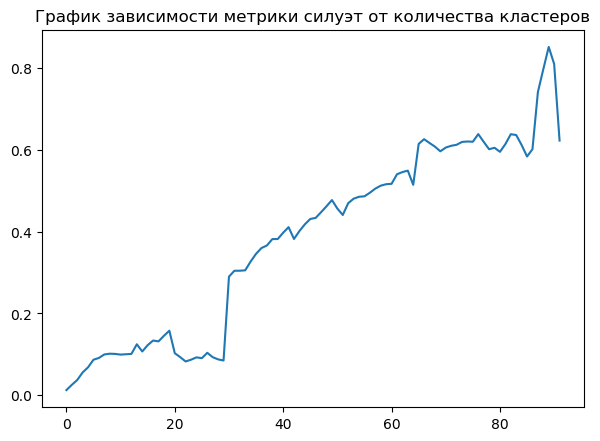

In [150]:
from sklearn import metrics

# clusters - массив из массивов, где каждый из массивов представляет
# из себя отдельный кластер. Кластеры определяются набором индексов
# в массиве точек X

def dClusters(distances, cluster1, cluster2):
    min = -1
    for i in range(len(cluster1)):
        for j in range(len(cluster2)):
            if min < 0 or distances[cluster1[i]][cluster2[j]] < min:
                min = distances[cluster1[i]][cluster2[j]]
    return min

def unify(i, j, clusters):
    unified = clusters[i] + clusters[j]
    clusters[i] = unified
    del clusters[j]
    return clusters

def getLabels(X, clusters):
    labels = [0 for i in range(len(X))]
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            labels[clusters[i][j]] = i
    return labels

clusters = [[i] for i in range(0, len(X))]
clustersDistances = distances.copy()
values = []

min = minDistance
minI = minDistanceI
minJ = minDistanceJ

maxSil = -2
maxLabels = []

labels1 = []
labels2 = []
labels3 = []
labels4 = []

for k in range(len(X), 2, -1):
    min = -1
    for i in range(len(clusters)):
        for j in range(len(clusters)):
            dd = dClusters(distances, clusters[i], clusters[j])
            if (dd < min or min < 0) and i != j:
                min = dd
                minI = i
                minJ = j
    
    clusters = unify(minI, minJ, clusters)    
    labels = getLabels(X, clusters)
    sil = metrics.silhouette_score(X, labels)
    values.append(sil)
    if (sil > maxSil):
        maxSil = sil
        maxLabels = labels
        
    if k == len(X):
        labels1 = labels
    elif k == 60:
        labels2 = labels
    elif k == 20:
        labels3 = labels
    elif k == 7:
        labels4 = labels
            
plt.plot(values)
plt.title("График зависимости метрики силуэт от количества кластеров")
plt.show()

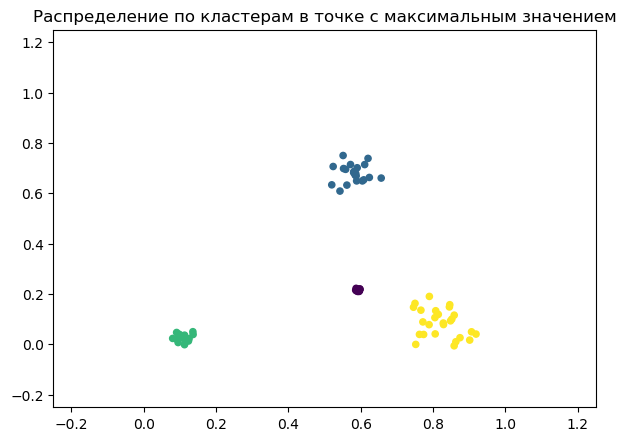

In [151]:
axes = plt.gca()
axes.set_xlim([-0.25, 1.25])
axes.set_ylim([-0.25, 1.25])
plt.scatter(X[:,0], X[:,1], c=maxLabels, s = 20.0)
plt.title("Распределение по кластерам в точке с максимальным значением")
plt.show()

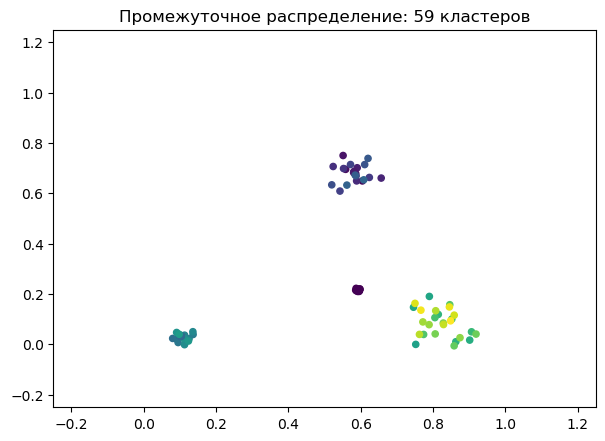

In [152]:
axes = plt.gca()
axes.set_xlim([-0.25, 1.25])
axes.set_ylim([-0.25, 1.25])
plt.scatter(X[:,0], X[:,1], c=labels2, s = 20.0)
plt.title("Промежуточное распределение: 59 кластеров")
plt.show()

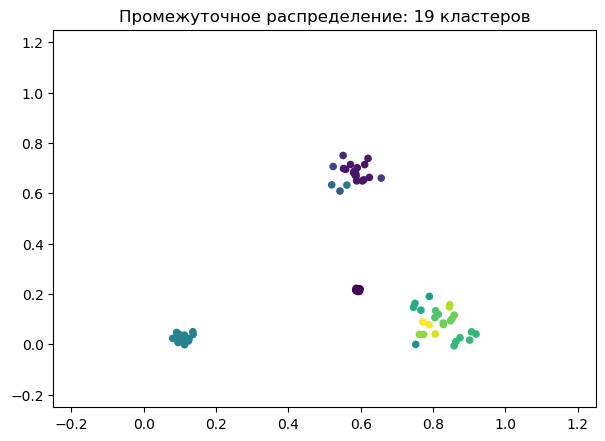

In [153]:
axes = plt.gca()
axes.set_xlim([-0.25, 1.25])
axes.set_ylim([-0.25, 1.25])
plt.scatter(X[:,0], X[:,1], c=labels3, s = 20.0)
plt.title("Промежуточное распределение: 19 кластеров")
plt.show()

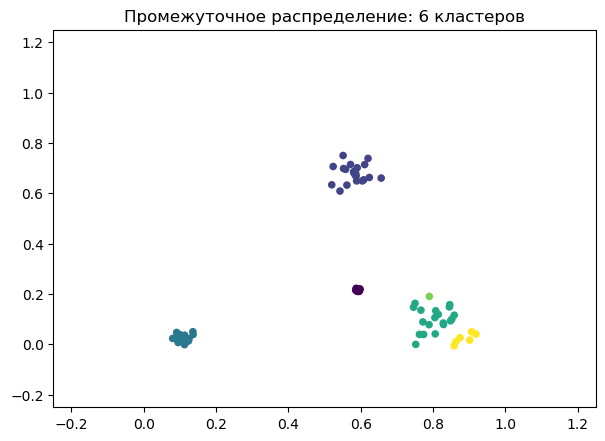

In [154]:
axes = plt.gca()
axes.set_xlim([-0.25, 1.25])
axes.set_ylim([-0.25, 1.25])
plt.scatter(X[:,0], X[:,1], c=labels4, s = 20.0)
plt.title("Промежуточное распределение: 6 кластеров")
plt.show()

In [ ]:
plt.plot()